In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# CREATING OUR 2 DATAFRAMES

In [43]:
# Here we use the pd.read_csv function from pandas to create our intial datframes for both datasets


dataframe1 = pd.read_csv("persons.csv")  # this is a random sample of fake people, who submitted their name, state and gender to a fake survey.
dataframe2 = pd.read_csv("genre_by_state.csv")  # this is a dataset of the most popular genre by state, the most popular artist by state and the most popular homegrown artist/band

# MERGING OUR DATAFRAMES BY STATE

In [44]:
merged_data = pd.merge(dataframe1, dataframe2, on="state", how="right") # here we merge the dataframes of both we need to pass 2 arguments to the merge function which is on=(the column we want to merge on), how=(where to put the remaining columns)
merged_data

,first_name,last_name,gender,state,age,genre,artist,homegrown
0,Domeniga,Geibel,Genderqueer,Alabama,54.0,Country,Kevin Gates,Alabama
1,Steven,O'Sharry,Male,Alabama,65.0,Country,Kevin Gates,Alabama
2,Marita,Bulley,Genderfluid,Alabama,25.0,Country,Kevin Gates,Alabama
3,Kai,Powell,Female,Alabama,45.0,Country,Kevin Gates,Alabama
4,Gennie,Cozins,Female,Alabama,62.0,Country,Kevin Gates,Alabama
...,...,...,...,...,...,...,...,...
962,Maryellen,Hailey,Female,Wisconsin,92.0,Country,Drake,Violent Femmes
963,Annmarie,Croxley,Female,Wisconsin,26.0,Country,Drake,Violent Femmes
964,Darice,Peace,Female,Wisconsin,82.0,Country,Drake,Violent Femmes
965,Caterina,Hanway,Female,Wisconsin,83.0,Country,Drake,Violent Femmes


# CLEANING MERGED DATA

In [45]:
merged_data.isna().sum()  # here we look for some NaN values, because the count is only 3 its safe to drop them
merged_data.dropna(inplace=True) #this allows us to drop the NaN inpace (without reassignment)


# ADDING NEW COLUMN CALLED CHOICE, BASED OFF OF GENDER, GENRE AND ARTIST

In [46]:
# Here we will add a new feature/column where if the genre is metal but the gender is femal, that person is more lilely to listen to the most poppular artist vs the genre

def set_choice(row):  # this function will be passed into the .apply() function and allow us to return a value to the newly set [choice] featur/column
  if row["gender"] != "male" and row["genre"] == "Metal":
    return row["artist"]
  else:
    return row["genre"]


merged_data["choice"] = merged_data.apply(set_choice, axis=1)  # We need to set the axis to 1 to specify apply this function on the row not the column
merged_data

,first_name,last_name,gender,state,age,genre,artist,homegrown,choice
0,Domeniga,Geibel,Genderqueer,Alabama,54.0,Country,Kevin Gates,Alabama,Country
1,Steven,O'Sharry,Male,Alabama,65.0,Country,Kevin Gates,Alabama,Country
2,Marita,Bulley,Genderfluid,Alabama,25.0,Country,Kevin Gates,Alabama,Country
3,Kai,Powell,Female,Alabama,45.0,Country,Kevin Gates,Alabama,Country
4,Gennie,Cozins,Female,Alabama,62.0,Country,Kevin Gates,Alabama,Country
...,...,...,...,...,...,...,...,...,...
961,Cello,Goodreid,Male,Wisconsin,16.0,Country,Drake,Violent Femmes,Country
962,Maryellen,Hailey,Female,Wisconsin,92.0,Country,Drake,Violent Femmes,Country
963,Annmarie,Croxley,Female,Wisconsin,26.0,Country,Drake,Violent Femmes,Country
964,Darice,Peace,Female,Wisconsin,82.0,Country,Drake,Violent Femmes,Country


# LETS PERFORM SOME VISUALIZATION ON THIS DATA


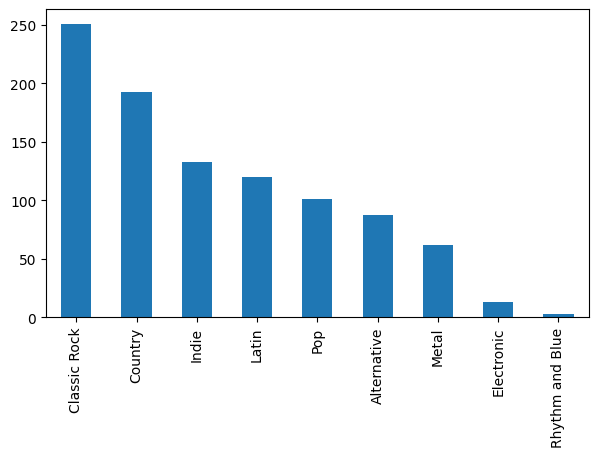

In [47]:
genre_count = merged_data['genre'].value_counts()  # Here we are counting the frequency of each value on the column genre
genre_count.plot(kind="bar", figsize=(7, 4)) # here we simplt plot those values using matplotlib 
plt.show()


Something to keep in mind:
While hip-hop and R&B are more prevalent than ever, streaming is what makes these genres so popular. They so predominate in the "contemporary artist" category but hardly ever appear in the most common touring genres. Hip-hop fans and users of streaming services are more likely to be younger listeners. Radio, records, and live performances are more likely to be preferred for genres like rock and country.

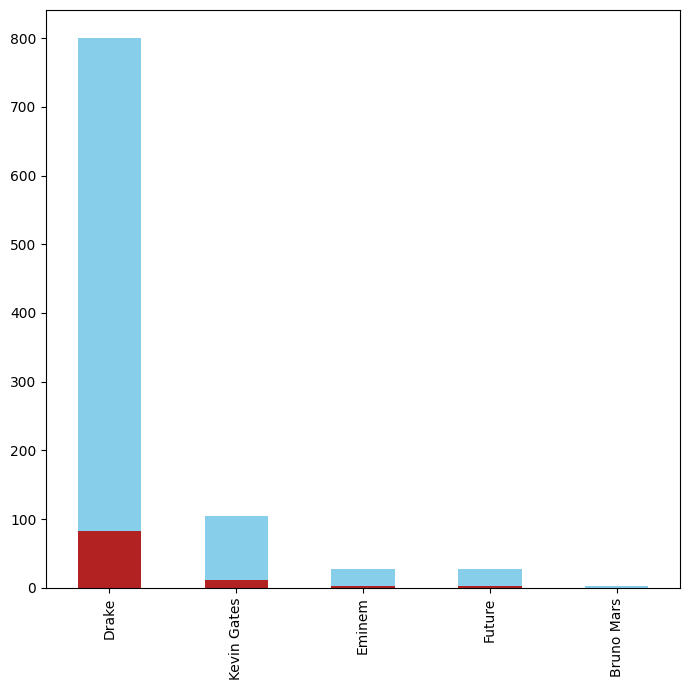


PERCENTAGE BY ARTIST
Drake has 83.18% of the states
Kevin Gates has 10.80% of the states
Eminem has 2.91% of the states
Future has 2.80% of the states
Bruno Mars has 0.31% of the states


In [48]:
genre_count = merged_data['artist'].value_counts()  # here we get the number of occurances of each artist
genre_percentages = merged_data['artist'].value_counts(normalize=True) * 100  # here we get the same thing then convert it to a percentage using normalized parameter

genre_count.plot(kind="bar", color="skyblue", figsize=(7, 7))  # here we simply plot the occurances using .plot and setting kind to bar
genre_percentages.plot(kind="bar", color="firebrick", figsize=(7, 7)) # here we simply plot the percentages in red using .plot and setting kind to bar

# Adjust the layout
plt.tight_layout()
plt.show()

print("\nPERCENTAGE BY ARTIST\n==================")
for artist, percent in genre_percentages.items(): # here we can iterate through the genre_percentages dictionary and print the percentage from each artist
  print(f"{artist} has {percent:.2f}% of the states")  # we use :.2f to round and stop at 2 decimal places

Here we can see drake pretty much dominates the most popular artist column, with arund 80% of the market!

ok now for a quick cleanup of data for the below task

In [49]:
rec_data = merged_data.drop_duplicates(subset=["state", "gender"])  # here will clean the data to keep only 1 gender per state for further calulation

# Now lets add our own functionality to ask someone for their gender, age, and state so we can reccomend them a genre or an artist. We will use vanilla python for this portion

Among those between the ages of 18 and 24, the leading artists included Lil Uzi Vert (54%), Halsey (48%), and Shawn Mendes (44%). However, the three most popular Hot 100 artists for people younger than 25 were not among the top three artists for older users. Instead, Facebook users aged 25 to 34 expressed more interest in Nicki Minaj (46%), Chris Brown (45%), and Migos (44%), among others. For users aged 45 and older, Kenny Chesney appeared in the top three, while fellow country music star Chris Stapleton had the most interest from users between the ages of 35 and 44.

In [51]:

def get_user_info():
  for _ in range(15):  # just a loop incase age produces en error
    try:
      gender = input("please enter your gender: ")
      age = int(input("Please enter your age: "))
      state = input("please enter your state: ")
      return gender, age, state
    except Exception:
      print("not a valid age")


def age_reccomendation(age):
  age_music = {"young": ("Lil Uzi Vert", "Halsey", "Shawn Mendes"), # here we build a simple dictionary for artists based off of age (each artist is in a tuple)
             "mid": ("Nicki Manaj", "Chris Brown", "Migos"),
             "older": ("Chris Stapleton"),}
  if 18 <= age <= 24:
    for value in age_music["young"]:
      print(value)
  elif 25 <= age <= 34:
    for value in age_music["mid"]:
      print(value)
  elif 35 <= age <= 44:
    for value in age_music["older"]:
      print(value)
  else:
    print("Kenny Chesney")


def gender_state_reccomendation(gender: str, state: str):
    matched_row = rec_data[(rec_data['gender'] == gender.capitalize()) & (rec_data['state'] == state.capitalize())] # we are creating a new row that matches the users gender and state
    if len(matched_row) == 0:
        print("no reccomendation")  # return None if there is no match
    else:
      if gender == "Male":
        print(matched_row['choice'].values[0])
      else:
        print(f"Your state's most poular genre is {matched_row['genre'].values[0]}")
        print(f"However based off of your gender we reccomend {matched_row['choice'].values[0]}")
        




def main():
  gender, age, state = get_user_info()
  print("\nHere are recommended artists based off of your age!\n=================")
  age_reccomendation(age)
  print("\nRecommended artist or genre based off of your gender and state!\n=================")
  gender_state_reccomendation(gender, state)


main()








please enter your gender: female
Please enter your age: 23
please enter your state: arizona

Here are recommended artists based off of your age!
Lil Uzi Vert
Halsey
Shawn Mendes

Recommended artist or genre based off of your gender and state!
Your state's most poular genre is Metal
However based off of your gender we reccomend Drake
